Objectifs - Etapes

Analyse exploratoire des données ;

Gestion des valeurs manquantes ;

Gestion des valeurs aberrantes (outliers) ;

Autres étapes possibles de prétraitement des données ;

Division de l'ensemble des données (données d'entraînement, de validation et de test) ;

Construction de plusieurs modèles à partir de différents algorithmes de Machine Learning ;

Comparaison des performances des algorithmes ;

Sélection et Evaluation du modèle final.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importation des librairies et des données

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraud"]

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/final projet GOMYCODE/creditcard.csv')

In [ ]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#Visualisation des données

Text(0, 0.5, 'Frequency')

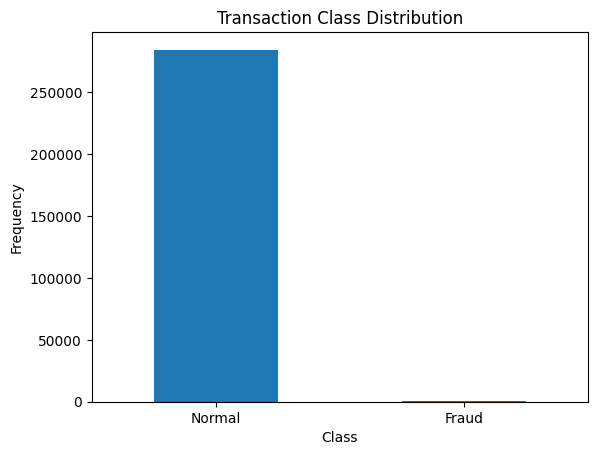

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

<ipython-input-11-a793ce5d4839>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-11-a793ce5d4839>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde_kws={"colo

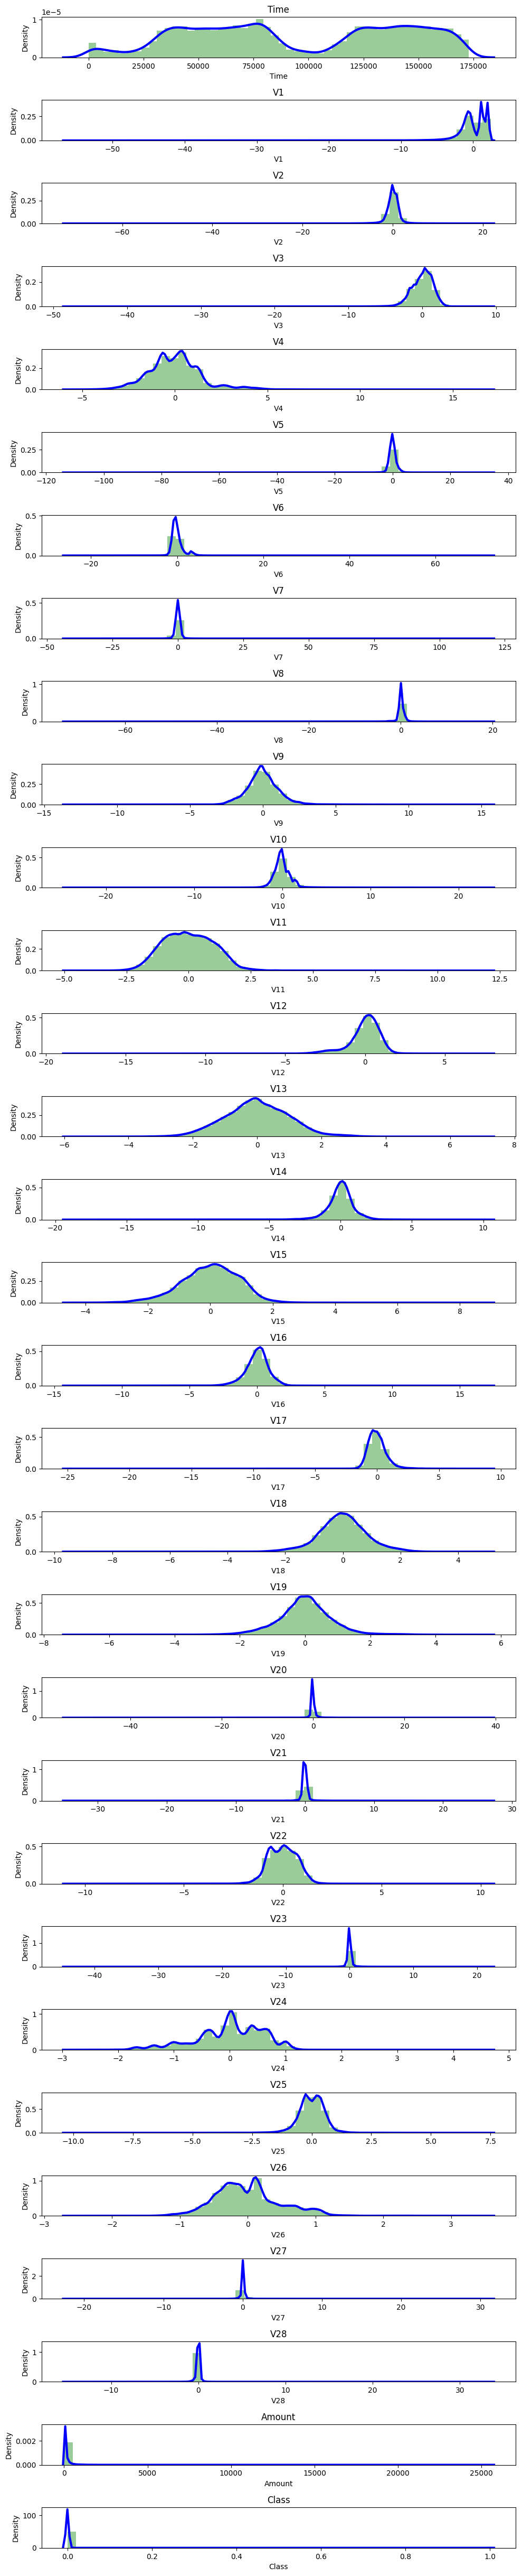

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
    plt.subplot(32, 1, i+1)
    #dessiner un diagramme de distribution de chaque colonne
    sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(data.columns[i])

plt.tight_layout()


Ces reprensatattion des diagrammes nous a permis d'avoir une idée sur la distribution des variables de notre jeu de données

<ipython-input-12-eb22c469800e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'], kde=False, bins=20);


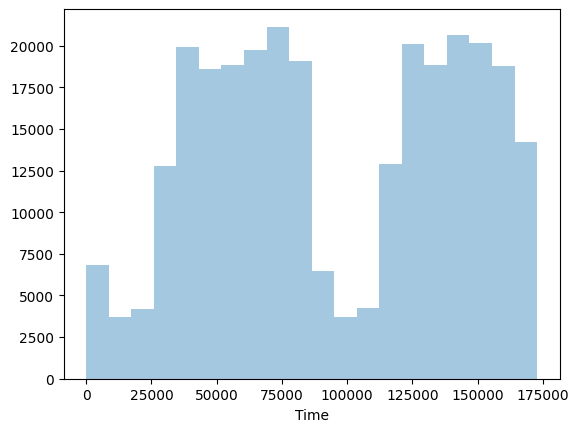

In [ ]:
sns.distplot(data['Time'], kde=False, bins=20);

<ipython-input-13-b7121b9fa3db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'], kde=False);


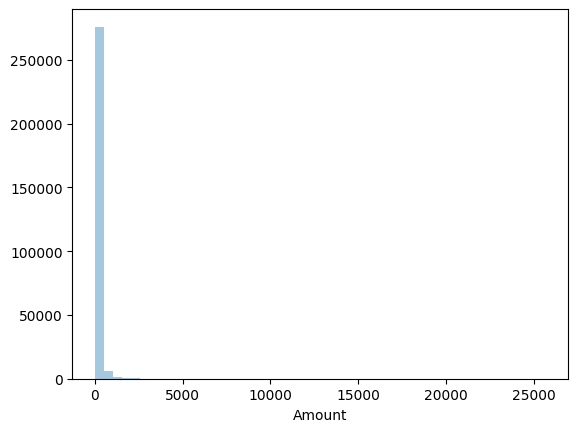

In [ ]:
sns.distplot(data['Amount'], kde=False);

In [ ]:
data['Amount'].value_counts(normalize = True)

1.00       0.048061
1.98       0.021221
0.89       0.017106
9.99       0.016667
15.00      0.011517
             ...   
62.09      0.000004
552.05     0.000004
1467.75    0.000004
196.68     0.000004
95.63      0.000004
Name: Amount, Length: 32767, dtype: float64

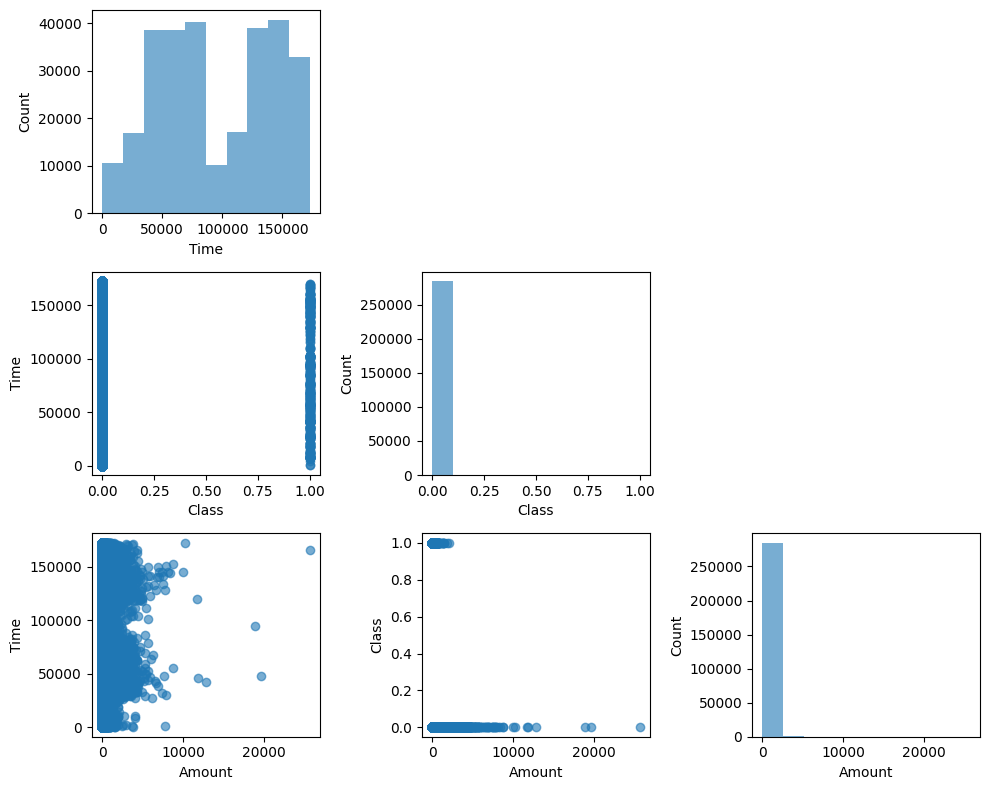

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols=["Time", "Class","Amount"]
scatterplotmatrix(data[cols].values, figsize=(10,8),
                  names=cols, alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: xlabel='V28'>

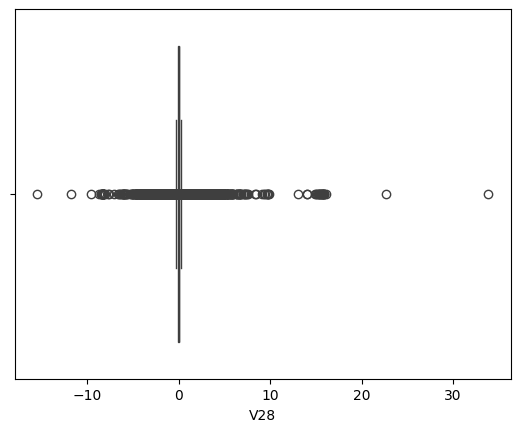

In [ ]:
sns.boxplot(x=data["V28"])

<Axes: xlabel='Class'>

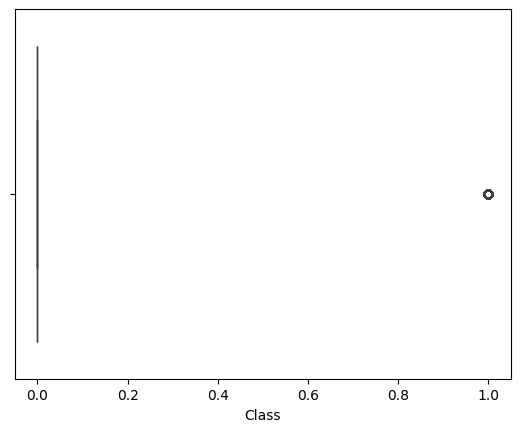

In [ ]:
sns.boxplot(x=data["Class"])

<Axes: xlabel='V28'>

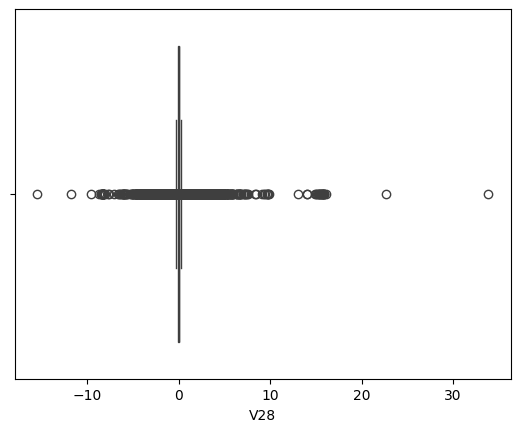

In [ ]:
sns.boxplot(x=data["V28"])

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Nettoyage des données

In [ ]:
#Pour remplacer nos valeurs manquantes, on utilise l'imputation de la moyenne
data['Amount'].fillna(data['Amount'].mean(), inplace=True)
data['Class'].fillna(data['Class'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
for i in data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

Time no
V1 yes
V2 yes
V3 yes
V4 yes
V5 yes
V6 yes
V7 yes
V8 yes
V9 yes
V10 yes
V11 yes
V12 yes
V13 yes
V14 yes
V15 yes
V16 yes
V17 yes
V18 yes
V19 yes
V20 yes
V21 yes
V22 yes
V23 yes
V24 yes
V25 yes
V26 yes
V27 yes
V28 yes
Amount yes
Class yes


Supprimons les valeurs aberrantes

In [ ]:
#removing outlier except for the last column
for i in data.iloc[:,:-1]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[i] > up_lim,i] = up_lim
    data.loc[data[i] < low_lim,i] = low_lim

In [ ]:
for i in data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

Time no
V1 no
V2 no
V3 no
V4 no
V5 no
V6 no
V7 no
V8 no
V9 no
V10 no
V11 no
V12 no
V13 no
V14 no
V15 no
V16 no
V17 no
V18 no
V19 no
V20 no
V21 no
V22 no
V23 no
V24 no
V25 no
V26 no
V27 no
V28 no
Amount no
Class yes


Il nous reste que dans la variable class un outlier.

Alors on peut le laisser dans le jeu de donné

Verifions les doublons

In [ ]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [ ]:
#Comptage du nombre de doublons
data.duplicated().sum()

1081

In [ ]:
#Suppression des doublons avec la methode dropduplicates
data=data.drop_duplicates()
data.shape

(283726, 31)

In [ ]:
#Une recherche rapide si il nous reste de doublons
#Cela nous montrera  qu'aucune ligne n'est concernée
data.loc[data.duplicated(keep=False),:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


<Axes: xlabel='V28'>

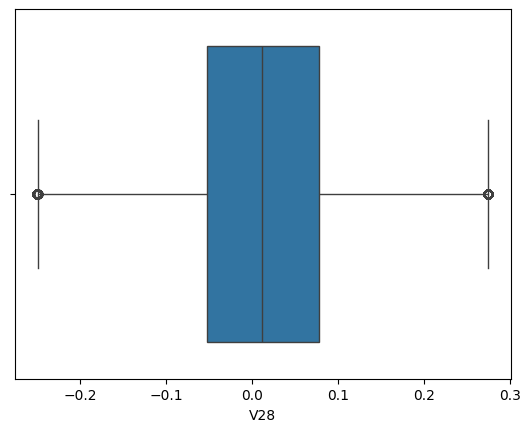

In [ ]:
sns.boxplot(x=data["V28"])

<Axes: xlabel='V18'>

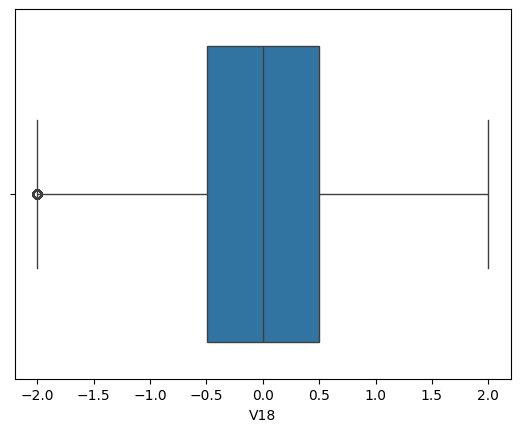

In [ ]:
sns.boxplot(x=data["V18"])

#Préparation des données

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
#from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
(fraud.shape,normal.shape)

((473, 31), (283253, 31))

In [ ]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count    473.000000
mean      58.801517
std       72.487521
min        0.000000
25%        1.000000
50%        9.820000
75%      105.890000
max      184.512500
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    283253.000000
mean         51.784932
std          61.685875
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max         184.512500
Name: Amount, dtype: float64

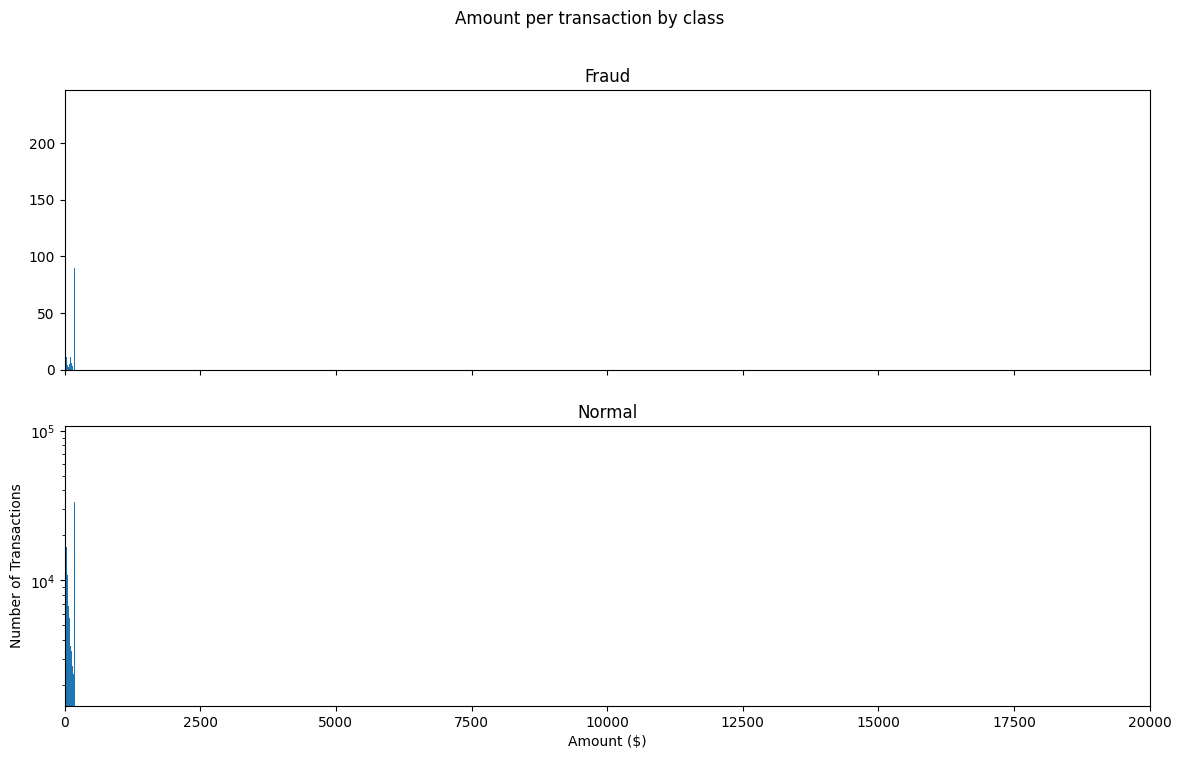

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 20
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

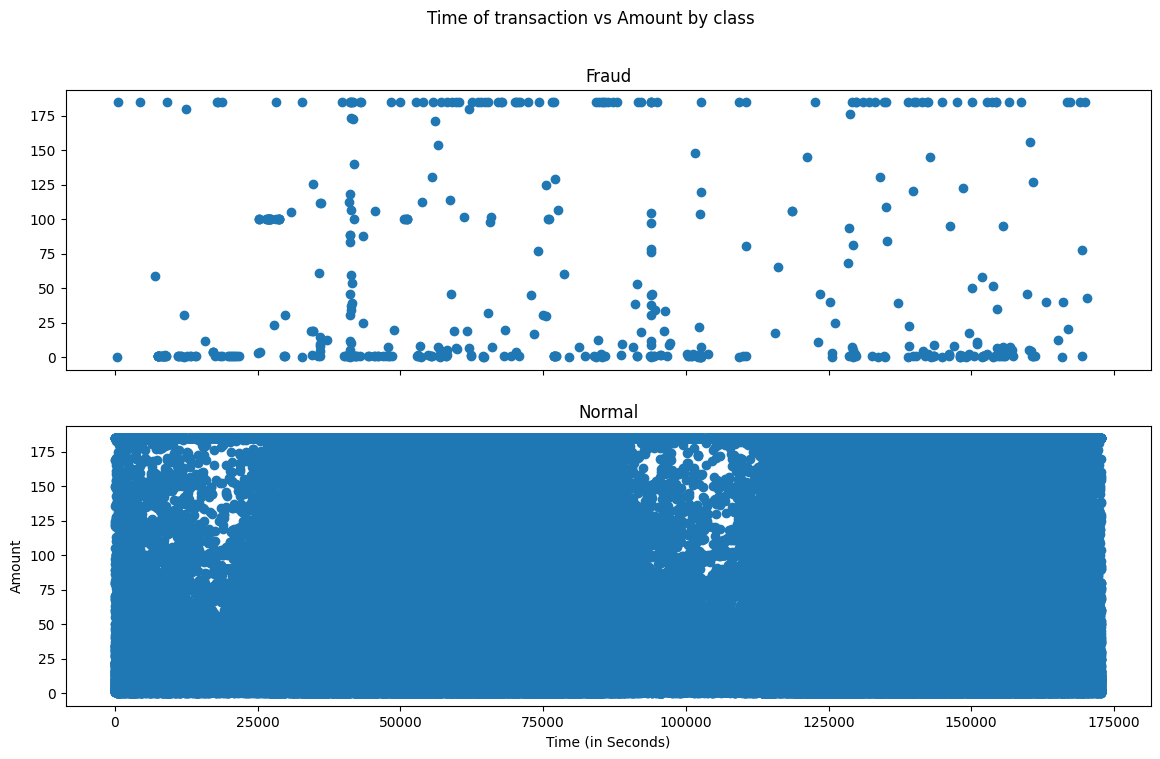

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28373, 31)

In [ ]:
data.shape

(283726, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.001411781315074295
Fraud Cases : 40
Valid Cases : 28333


473
283253


<Axes: xlabel='Class', ylabel='count'>

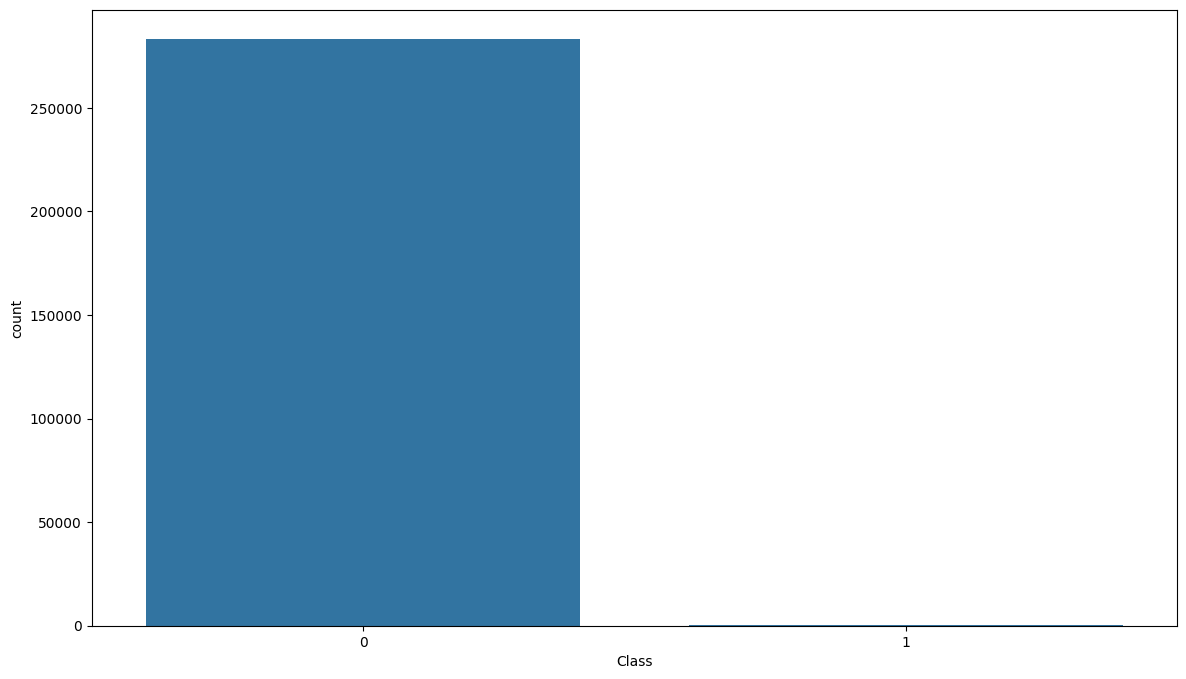

In [ ]:
Fraud=data[data["Class"]==1]
Valid=data[data["Class"]==0]
print(len(Fraud))
print(len(Valid))
import seaborn as sns
sns.countplot(x='Class', data=data)

#Feature Engeneering

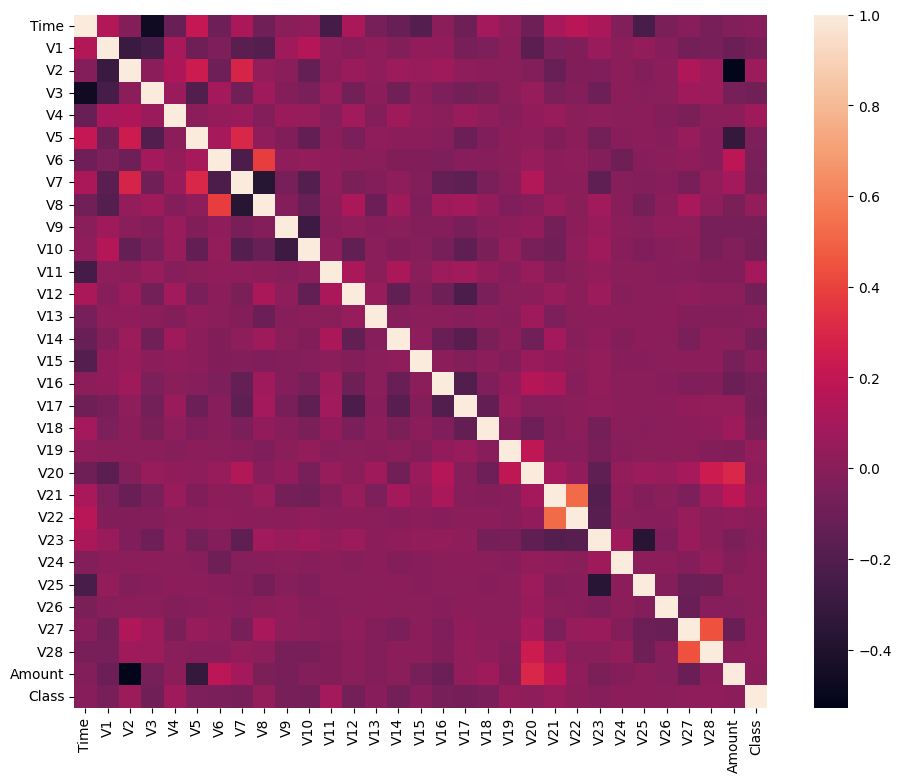

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=data1.corr()
fig = plt.figure(figsize = (12, 9))
vmax=70;
vmin=30;
sns.heatmap(corrmat,square=True)
plt.show()

Score de dépenses (1-100)D'après la matrice de corrélation ci-dessus, nous pouvons voir que v2 et v5 ont une forte corrélation négative avec le montant et que v7 et v20 ont également une corrélation positive avec le montant.

In [ ]:
print(data.head())

data=data.reset_index()
data=data.drop(["index"],axis=1)
cols = list(data.columns.values)
data = data[['V1', 'V2', 'V3', 'V4', 'V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Class']]
print(data.head())

X = data.iloc[:, data.columns != 'Class']
Y = data.iloc[:, data.columns == 'Class']

print(X.shape)
print(Y.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.611875 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = data.drop('Class', axis=1)
y = data.Class
X = scalar.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X, y,test_size = 0.1,random_state=0)

#Modelisation

RANDOM FOREST

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Importing metrics to test accuracy
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
y_pred = rfc.predict(x_test)  # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.999982377612519


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       1.00      0.99      0.99        87

    accuracy                           1.00     56746
   macro avg       1.00      0.99      1.00     56746
weighted avg       1.00      1.00      1.00     56746



REGRESSION LOGISTIQUE

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
accuracy_score(y_val, logreg.predict(x_val))
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=1.00


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      0.02      0.04       142

    accuracy                           1.00     85118
   macro avg       1.00      0.51      0.52     85118
weighted avg       1.00      1.00      1.00     85118



DECISION TREE

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
from sklearn import metrics

#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9999118880625947


<Axes: xlabel='predicted fraud', ylabel='Fraud'>

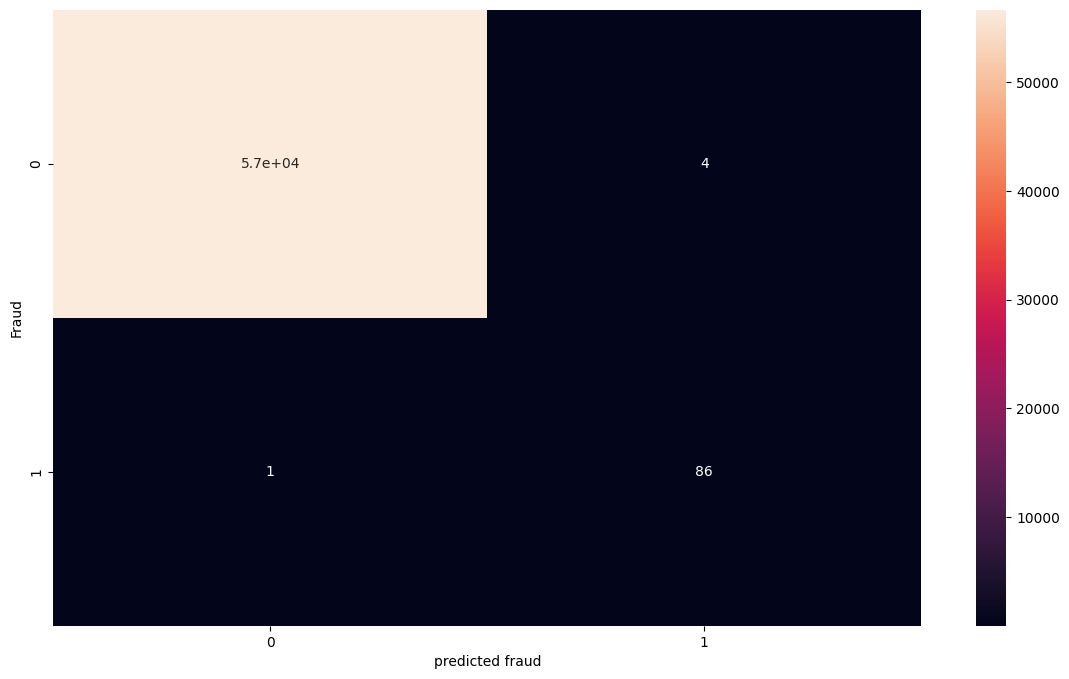

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Fraud'], colnames=['predicted fraud'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.96      0.99      0.97        87

    accuracy                           1.00     56746
   macro avg       0.98      0.99      0.99     56746
weighted avg       1.00      1.00      1.00     56746



SVM

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
model_svc.score(x_train,y_train)
model_svc.score(x_test,y_test)
y_predict = model_svc.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9999118880625947


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,67,20
is Normal,6,56653


<Axes: >

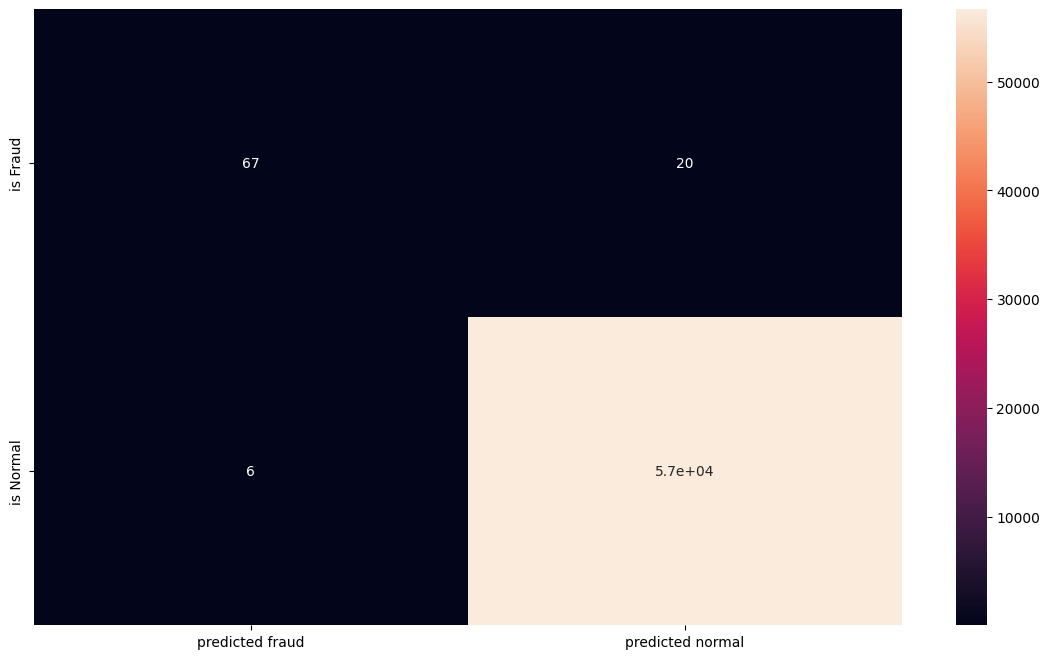

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.96      0.99      0.97        87

    accuracy                           1.00     56746
   macro avg       0.98      0.99      0.99     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)   #fitting our model
y_pred=bc.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9998237761251895


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,67,20
is Normal,6,56653


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.96      0.92      0.94        87

    accuracy                           1.00     56746
   macro avg       0.98      0.96      0.97     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Evaluation des performances et choix du modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(y_val, pred)
  print('Score global du modèle :', round(score, 3))


In [ ]:
models = [rfc.fit(x_train, y_train), logreg.fit(x_train, y_train),
          model_svc.fit(x_train, y_train), bc.fit(x_train, y_train), tree.fit(x_train, y_train)]

for model in models:
  print('Modèle ' + str(model))
  model_evaluation(model, x_val, y_val)
  print('-'*90)

Modèle RandomForestClassifier()
Score global du modèle : 1.0
------------------------------------------------------------------------------------------
Modèle LogisticRegression()
Score global du modèle : 0.999
------------------------------------------------------------------------------------------
Modèle SVC()
Score global du modèle : 0.999
------------------------------------------------------------------------------------------
Modèle BaggingClassifier()
Score global du modèle : 0.999
------------------------------------------------------------------------------------------
Modèle DecisionTreeClassifier()
Score global du modèle : 0.999
------------------------------------------------------------------------------------------


In [ ]:
rfc.fit(x_train, y_train)
accuracy_score(y_test, rfc.fit(x_train, y_train).predict(x_test))

0.9999647552250379

Conclusion

 En comparant les modeles algorithmes d'apprentissage Automatiques dans ce lab:

  _ Random Forest

  _ SVM détectant

  _ Decisin tree

  _Bagging  
  _Regression logistique

En  etudiant les performances de notre meilleur modele dont l'accuracy est de 0.99 presque 100%  sur les données de tests, cela montre que notre modele a overfitter sur les données d'entrainement car les données sont désequilibrées.

Dont pour éviter ce fléau  nous allons utiliser les methodes suivantes:

Pour plus de comprehension

SMOTE

OVERSAMPLLING

UNDERSAMPLING


In [ ]:
# Importing Required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create Train and Test Data in ratio 70:30
X = data.drop(labels='Class', axis=1) # Features
y = data.loc[:,'Class']               # Target Variable


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=x_train.columns)
mutual_infos.sort_values(ascending=False)

V14    0.467927
V17    0.452298
V10    0.444662
V11    0.418853
V4     0.407931
V12    0.403782
V3     0.371107
V16    0.342784
V7     0.311495
V2     0.283008
V9     0.249632
V21    0.222542
V1     0.219048
V18    0.202551
V6     0.196371
V27    0.178793
V5     0.163387
V28    0.138822
V8     0.133213
V20    0.113064
V19    0.112231
V24    0.067104
V23    0.052631
V26    0.043436
V25    0.029911
V22    0.026487
V15    0.020170
V13    0.018350
dtype: float64

In [ ]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)

def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))

    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))

    print('F1-Score')
    print(f1_score(y_test, y_pred))

    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [ ]:
# The parameters of each classifier are different
# Hence, we do not make use of a single method and this is not to violate DRY Principles
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
grid_eval(grid_sgd)

Best Score 0.9091861950616826
Best Parameter {'model__alpha': 0.001, 'model__class_weight': 'balanced', 'model__loss': 'hinge'}


In [ ]:
evaluation(y_test, grid_sgd, x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.88      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118

AUC-ROC
0.9284198885650564
F1-Score
0.11066843736166446
Accuracy
0.9763974717451068


In [ ]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
grid_eval(grid_rf)

Best Score 0.9997982770311902
Best Parameter {'model__n_estimators': 75}


In [ ]:
evaluation(y_test, grid_rf, x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.85      0.78      0.82       142

    accuracy                           1.00     85118
   macro avg       0.93      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC
0.8907332741506468
F1-Score
0.8161764705882353
Accuracy
0.9994125801828051


In [ ]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
grid_eval(grid_lr)

Best Score 0.9086048956103431
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [ ]:
evaluation(y_test, grid_lr, x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC
0.9262133831988353
F1-Score
0.09491268033409264
Accuracy
0.9719918231161446


In [ ]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
grid_eval(grid_knn)

Best Score 0.9978185798350481
Best Parameter {'model__p': 2}


In [ ]:
evaluation(y_test, grid_knn, x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.46      0.80      0.58       142

    accuracy                           1.00     85118
   macro avg       0.73      0.90      0.79     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC
0.9006199927866958
F1-Score
0.5846153846153846
Accuracy
0.9980967597922884


UnderSampling

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

# Create a pipelin]
pipeline= Pipeline([
  ('model',  LinearSVC(random_state=14))])
#pipeline = make_pipeline(NearMiss(version=2, random_state=14),LinearSVC(random_state=14))
pipeline.fit(x_train, y_train)
#X_res, y_res = sm.fit_resample(x_train, y_train)
# Classify and report the results
from collections import Counter
print(sorted(Counter(y_res).items()))
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_res, y_res)
clf.predict(x_val)
predictR = clf.predict(x_val)
#print(classification_report(y_val,predictR))
#print(confusion_matrix(y_val,predictR))
print(classification_report_imbalanced(y_val, pipeline.predict(x_val)))

[(0, 198277), (1, 198277)]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.67      1.00      0.82      0.69     28334
          1       0.74      0.67      1.00      0.70      0.82      0.64        39

avg / total       1.00      1.00      0.67      1.00      0.82      0.69     28373



OverSampling

Suréchantillonnage
L'un des moyens de lutter contre ce problème consiste à générer de nouveaux échantillons dans les classes sous-représentées. La stratégie la plus naïve consiste à générer de nouveaux échantillons en procédant à un échantillonnage aléatoire avec remplacement des échantillons actuellement disponibles, ce qui revient à dupliquer certains des échantillons originaux de la classe minoritaire.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, y_res = sm.fit_resample(x_train, y_train)
from collections import Counter
print(sorted(Counter(y_res).items()))
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_res, y_res)
clf.predict(x_val)
predictR = clf.predict(x_val)
print(classification_report(y_val,predictR))
print(confusion_matrix(y_val,predictR))

[(0, 198277), (1, 198277)]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28334
           1       0.01      0.82      0.02        39

    accuracy                           0.91     28373
   macro avg       0.51      0.86      0.49     28373
weighted avg       1.00      0.91      0.95     28373

[[25765  2569]
 [    7    32]]
